In [1]:
# Import Dependencies
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
sns.set(style="whitegrid")
plt.style.use('seaborn-whitegrid')


In [3]:
 # Read csv file 2022 
df= pd.read_csv('Resources/Combined_Flights_2022.csv')

# Display dataframe
df

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,1228.0,0.0,40.0,72.0,65.0,212.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4301,C5,20445,C5,N21144,4301,11921,1192102,31921,"Grand Junction, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1100-1159,17.0,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,848.0,0.0,55.0,77.0,80.0,295.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4299,C5,20445,C5,N16170,4299,12206,1220605,32206,"Harlingen/San Benito, TX",TX,48,Texas,74,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.0,-1.0,0700-0759,16.0,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,1636.0,0.0,47.0,70.0,82.0,251.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4298,C5,20445,C5,N21144,4298,11413,1141307,30285,"Durango, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1500-1559,21.0,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,1547.0,0.0,57.0,90.0,77.0,376.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4296,C5,20445,C5,N11184,4296,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,11973,1197302,31973,"Gulfport/Biloxi, MS",MS,28,Mississippi,53,0.0,-1.0,1400-1459,16.0,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,1251.0,6.0,49.0,70.0,76.0,251.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4295,C5,20445,C5,N17146,4295,11413,1141307,30285,"Durango, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,0.0,1100-1159,19.0,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078313,2022-03-31,Republic Airlines,MSY,EWR,False,True,1949,2014.0,25.0,25.0,234.0,NaN,NaN,185.0,NaN,1167.0,2022,1,3,31,4,UA,UA_CODESHARE,19977,UA,3621,YX,20452,YX,N745YX,3621,13495,1349505,33495,"New Orleans, LA",LA,22,Louisiana,72,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,1.0,1.0,1900-1959,17.0,2031.0,202.0,32.0,2354,NaN,NaN,NaN,2300-2359,5,1
4078314,2022-03-17,Republic Airlines,CLT,EWR,True,False,1733,1817.0,44.0,44.0,NaN,NaN,NaN,129.0,NaN,529.0,2022,1,3,17,4,UA,UA_CODESHARE,19977,UA,3437,YX,20452,YX,N654RW,3437,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,1.0,2.0,1700-1759,NaN,NaN,NaN,NaN,1942,NaN,NaN,NaN,1900-1959,3,0
4078315,2022-03-08,Republic Airlines,ALB,ORD,False,False,1700,2318.0,378.0,378.0,59.0,381.0,135.0,158.0,161.0,723.0,2022,1,3,8,2,UA,UA_CODESHARE,19977,UA,3413,YX,20452,YX,N733YX,3413,10257,1025702,30257,"Albany, NY",NY,36,New York,22,13930,1393007,30977,"Chicago, IL",IL,17,Illinoi

In [4]:
# check null values in dataset and fill with 0
df = df.fillna(0)


In [5]:
# format output of describe function

df.describe().apply(lambda x: x.apply(lambda y: '{:.0f}'.format(y) if isinstance(y, (int, float)) else y)).T


,count,mean,std,min,25%,50%,75%,max
CRSDepTime,4078318,1330,490,1,914,1320,1735,2359
DepTime,4078318,1295,547,0,853,1309,1736,2400
DepDelayMinutes,4078318,16,52,0,0,0,10,7223
DepDelay,4078318,13,53,-78,-5,-1,10,7223
ArrTime,4078318,1413,591,0,1020,1443,1906,2400
ArrDelayMinutes,4078318,15,51,0,0,0,10,7232
AirTime,4078318,107,72,0,57,91,139,727
CRSElapsedTime,4078318,141,72,-48,89,124,171,690
ActualElapsedTime,4078318,131,75,0,80,116,165,764
Distance,4078318,798,591,31,368,643,1035,5095


Distribution of Flights By Airline 

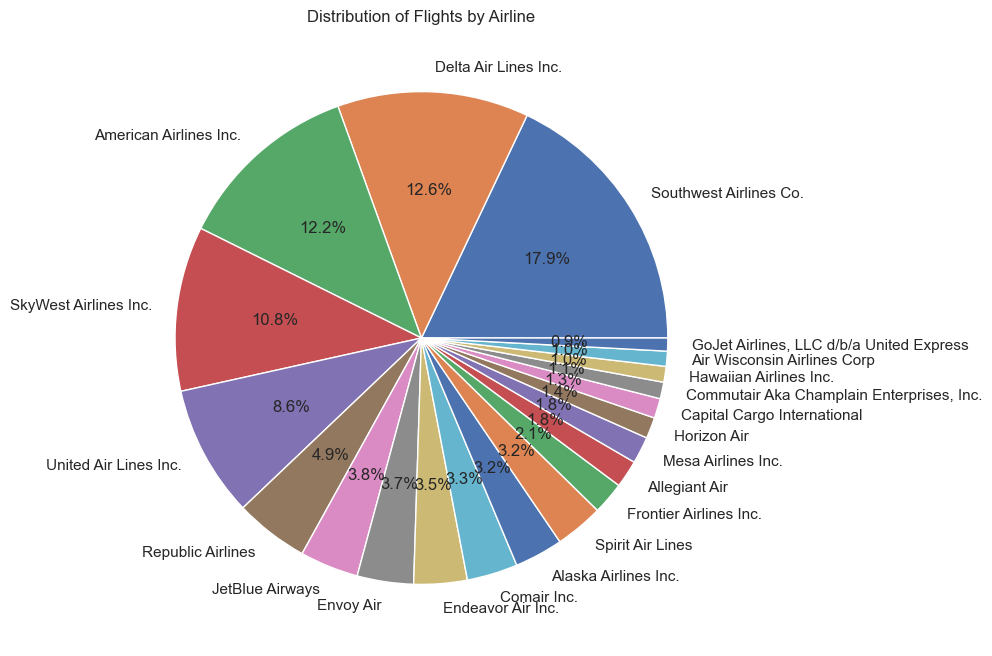

In [24]:
# airline counts
airline_counts = df["Airline"].value_counts()

# Extract unique airline names and their corresponding counts
Name = airline_counts.index
size = airline_counts.values

# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(size, labels=Name, autopct='%1.1f%%')
plt.title("Distribution of Flights by Airline")
plt.savefig('Images/Airlines.png') 
plt.show()



Number of Flight by Airline

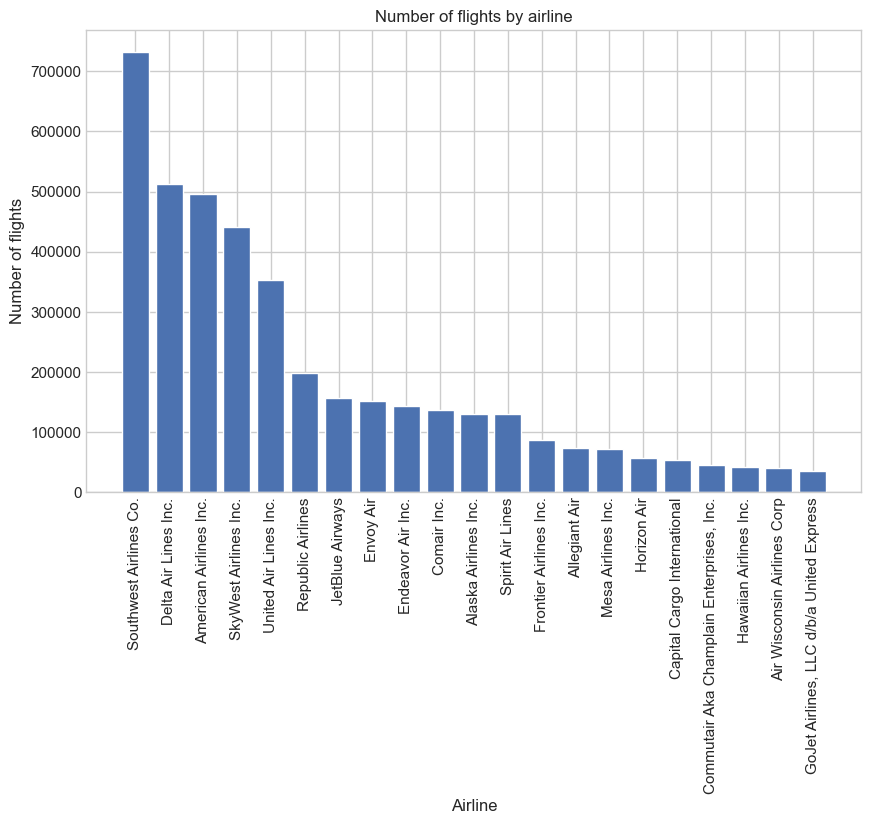

In [25]:
# airline count
airline_counts = df['Airline'].value_counts()

# Extract airlines and their corresponding counts
airlines = airline_counts.index
counts = airline_counts.values

# Create a bar chart of flight counts
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(airlines, counts)
ax.set_xlabel('Airline')
ax.set_ylabel('Number of flights')
ax.set_title('Number of flights by airline')
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
plt.savefig('Images/Number_of_Flights_By_Airline.png') 
plt.show()


Number of Flights by Month

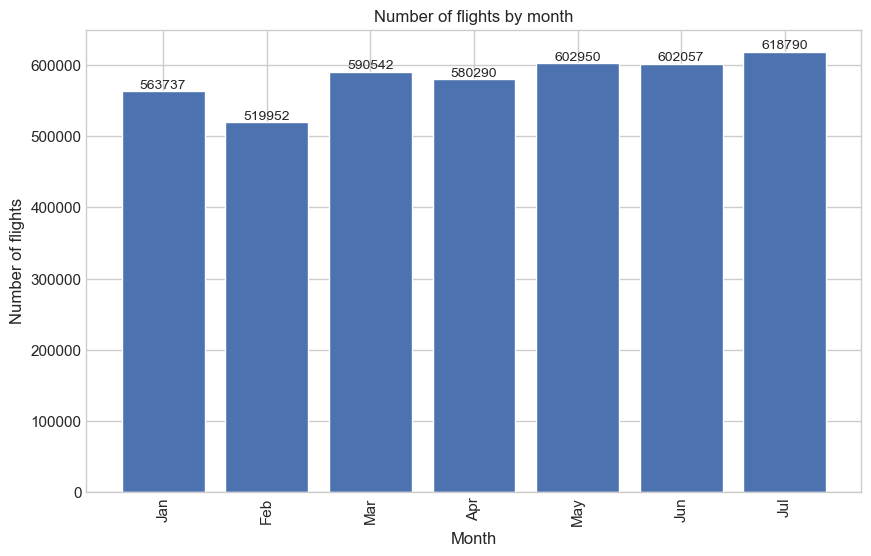

<Figure size 640x480 with 0 Axes>

In [26]:
# flight count by month
flight_counts_by_month = df['Month'].value_counts().sort_index()

# month names stored in variable 
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Extract months and their corresponding flight counts
months = flight_counts_by_month.index
counts = flight_counts_by_month.values

# Create a bar chart for number of flights by month 
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(months, counts)
ax.set_xlabel('Month')
ax.set_ylabel('Number of flights')
ax.set_title('Number of flights by month')
plt.xticks(rotation=90) 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: month_names[int(x) - 1]))  

# Add labels on top of each bar
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom', fontsize=10)

 
plt.show()
plt.savefig('Images/Flights_By_Month.png')



Number of Flights and Cancellation Percentage by Airline

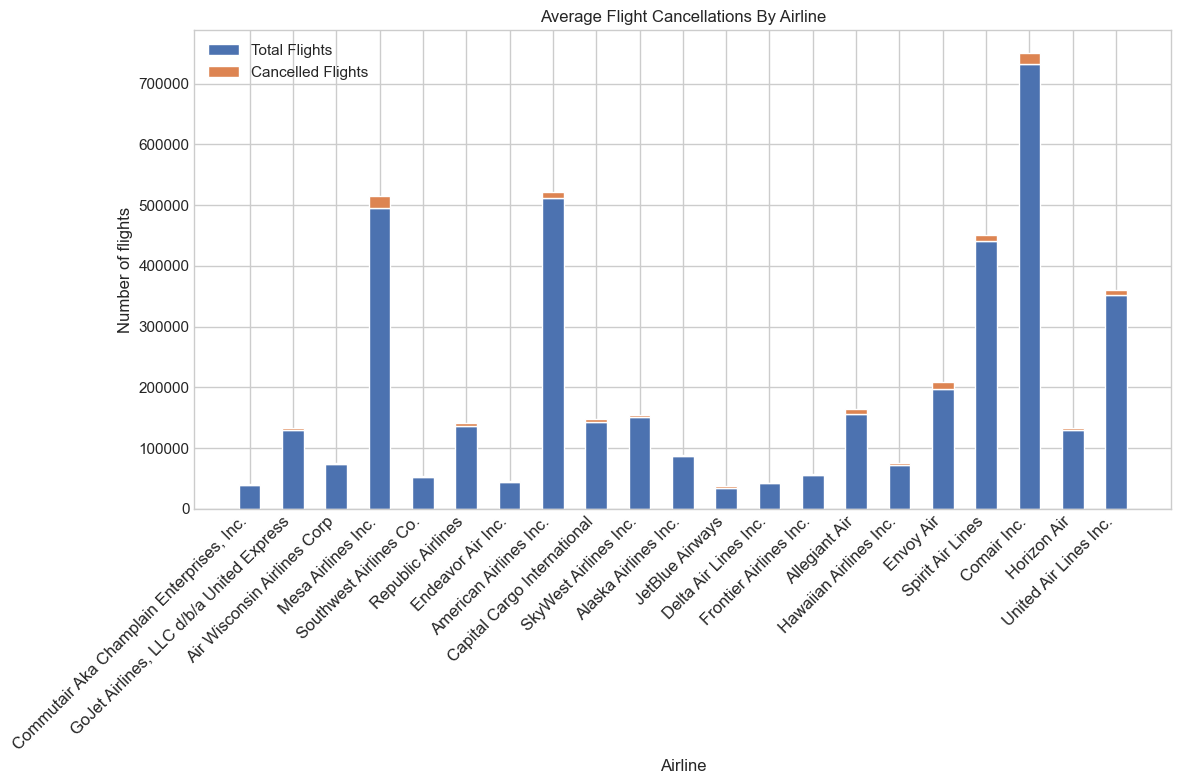

In [27]:
# airline names, total flights, and cancelled flights 
airlines = df['Airline'].unique()
Total_Flights = df.groupby('Airline')['Flight_Number_Operating_Airline'].count().tolist()
cancelled_flights = df[df['Cancelled'] == 1].groupby('Airline')['Cancelled'].count().tolist()

# flight counts and cancelled percentages
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.5
bar_height = 0.7
index = range(len(airlines))

bar1 = ax.bar(index, Total_Flights, bar_width, label='Total Flights', align='center')
bar2 = ax.bar(index, cancelled_flights, bar_width, label='Cancelled Flights', align='center', bottom=Total_Flights)

ax.set_xlabel('Airline')
ax.set_ylabel('Number of flights')
ax.set_title('Average Flight Cancellations By Airline')

# Adjust x-axis label rotation and font size
plt.xticks(index, airlines, rotation=45, fontsize=12, ha='right')

# Add legend
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('Images/Flight_Cancellations.png')
plt.show()


# Flight Cancellations By Airlines 

* Airlines with the Lowest Number of Cancelled Flights:
    Hawaiian Airlines has the lowest number of canceled flights, with 351 cancellations.
    Horizon Air, Air Wisconsin Airlines, and Capital Cargo International Airlines also have relatively low numbers of cancellations.
*  Airlines with the Highest Number of Cancelled Flights:
    American Airlines and Southwest Airlines have the highest number of canceled flights, with 18,736 and 18,164 cancellations, respectively.
    Delta Air Lines Inc. also has a significant number of canceled flights, with 10,341 cancellations.
* Variability in Cancellations:
    There is a wide range of flight cancellations among different airlines, indicating variations in their operational reliability and ability to handle disruptions.
* Comparison to Arrival and Departure Delays: It's important to note that while some airlines may have high numbers of cancellations, they may also have lower total arrival and departure delays. Cancellations can sometimes be a proactive measure to avoid extensive delays in certain situations, such as severe weather.

*  Flight cancellations can occur due to various factors, including weather-related issues (e.g., hurricanes, snowstorms), maintenance problems, crew availability, and operational decisions.

Departure Delays By Airline

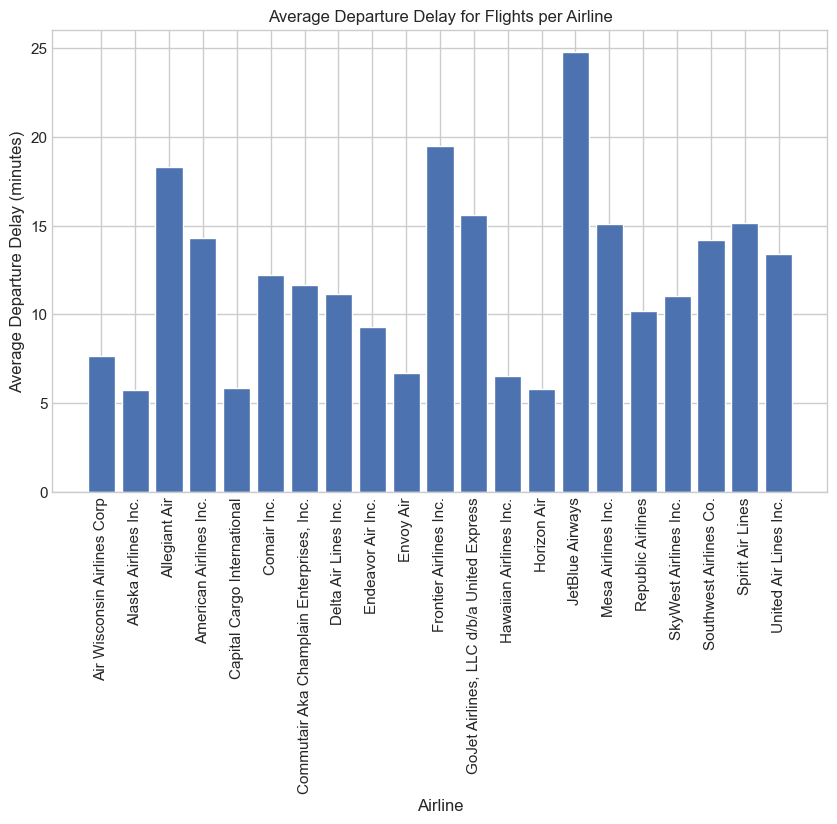

In [22]:
# Group by airline and calculate the average departure delay
avg_delay = df.groupby('Airline')['DepDelay'].mean()

# airline names 
airlines = avg_delay.index

# Create a bar chart of the average departure delay per airline
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(airlines, avg_delay)
ax.set_xlabel('Airline')
ax.set_ylabel('Average Departure Delay (minutes)')
ax.set_title('Average Departure Delay for Flights per Airline')
plt.xticks(rotation=90)
plt.savefig('Images/Flight_Departure_Delays.png') 
plt.show()


# Airline Departure Delays

 * Airlines with the Lowest Total Departure Delays:
    Air Wisconsin Airlines has the lowest total departure delay, with 5726 minutes of delay. 
    Hawaiian Airlines and Capital Cargo International Airlines also have relatively low total departure delays.
 * Airlines with the Highest Total Departure Delays:
    American Airlines and Southwest Airlines have the highest total departure delays, with 104,963 and 210,010 minutes of delay, respectively.
    Delta Air Lines Inc. also has a significant total departure delay of 91,349 minutes.
* Variability in Departure Delays:
   Several factors can contribute to departure delays, including weather conditions, air traffic congestion, maintenance issues, and scheduling. 
Further analysis would be required to identify the specific causes of delays for each airline.  

Arrival Delays By Airline

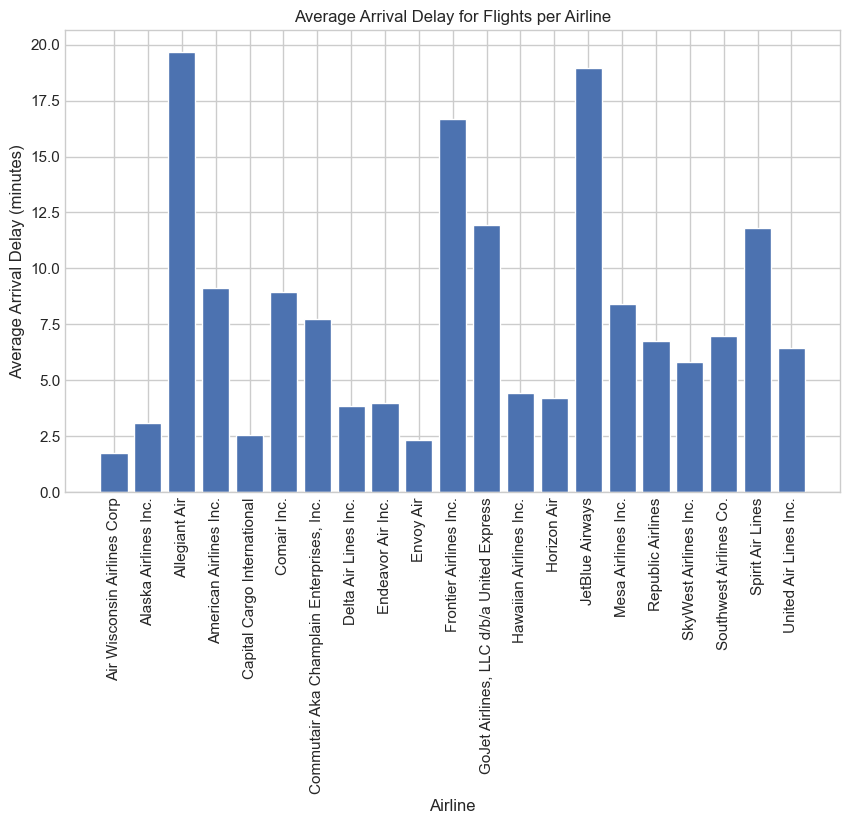

In [23]:
# Group by airline and calculate the average arrival delay
avg_delay = df.groupby('Airline')['ArrDelay'].mean()

# Extract the airline names
airlines = avg_delay.index

# Create a bar chart of the average arrival delay per airline
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(airlines, avg_delay)
ax.set_xlabel('Airline')
ax.set_ylabel('Average Arrival Delay (minutes)')
ax.set_title('Average Arrival Delay for Flights per Airline')
plt.xticks(rotation=90)
plt.savefig('Images/Flight_Arrival_Delays.png') 
plt.show()


# Airlines with Arrival Delays

* Airlines with the Lowest Total Arrival Delays:
    Air Wisconsin Airlines has the lowest total arrival delay, with 6,182 minutes of delay.
    Hawaiian Airlines and Capital Cargo International Airlines also have relatively low total arrival delays.
* Airlines with the Highest Total Arrival Delays:
    Southwest Airlines and American Airlines have the highest total arrival delays, with 177,164 and 107,894 minutes of delay, respectively.
    Delta Air Lines Inc. also has a significant total arrival delay of 86,875 minutes.
* Variability in Arrival Delays:
    Just like in the departure delay analysis, there is a wide range of arrival delays among different airlines, indicating variations in their on-time performance.
Airlines like JetBlue Airways, SkyWest Airlines, United Airlines, and Delta Air Lines Inc. have relatively high arrival delays compared to others.